In [374]:
import numpy as np
import pandas as pd
import re
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import json_normalize

import requests 
import json
import os
from dotenv import load_dotenv

import time

In [292]:
df_vg = pd.read_csv("./data/vgsales.csv" , index_col = "Rank" )
df_vg.head()

pd.set_option('display.max_rows', None)



In [293]:
df_vg.shape

(16598, 10)

In [294]:
df_vg = df_vg.drop_duplicates()

In [295]:
df_vg.shape

(16597, 10)

In [296]:
print(df_vg.columns)

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [297]:
df_vg.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [298]:
def drop_na(df):
    df = df.dropna(axis = 0, how="all")
    return df
df_vg = drop_na(df_vg)

In [299]:
df_vg.shape

(16597, 10)

In [300]:
pd.isna(df_vg).sum()

Name              0
Platform          0
Year            270
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [301]:
def drop_na_column(df, col_name):
    df = df[df[col_name].notna()]
    return df

In [302]:
df_vg = drop_na_column(df_vg, "Year")

In [303]:
df_vg = drop_na_column(df_vg, "Publisher")

In [304]:
df_vg.shape

(16291, 10)

In [305]:
pd.isna(df_vg).sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# Genre with most games


In [307]:
genre = df_vg["Genre"].value_counts()
genre

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [346]:
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize": (17.,6.)})
#sns.plotting_context("talk")
sns.set_context("poster")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

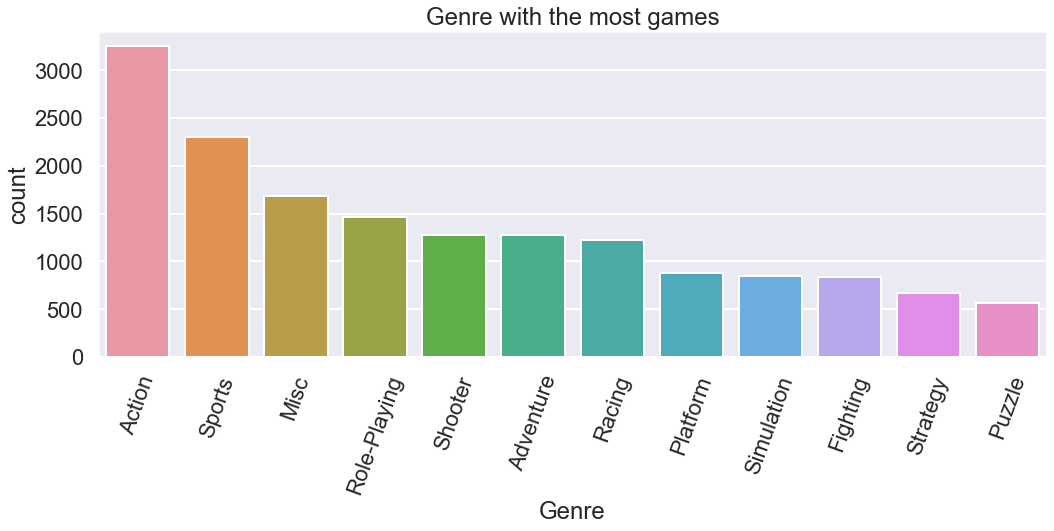

In [310]:
sns.countplot(x="Genre", data=df_vg, order = df_vg["Genre"].value_counts().index).set(title='Genre with the most games')
sns.color_palette("hls", 8)

plt.xticks(rotation=70)

# Genre with the most sales
Grouping by genre to get the global sales per genre 

In [313]:
Global_sale_genre = df_vg.groupby(by=['Genre'])['Global_Sales'].sum().reset_index()
Global_sale_genre
Global_sale_genre.sort_values(by = ["Global_Sales"], ascending = False)



,Genre,Global_Sales
0,Action,1722.84
10,Sports,1309.24
8,Shooter,1026.20
7,Role-Playing,923.83
4,Platform,829.13
3,Misc,789.87
6,Racing,726.76
2,Fighting,444.05
9,Simulation,389.98
5,Puzzle,242.21


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

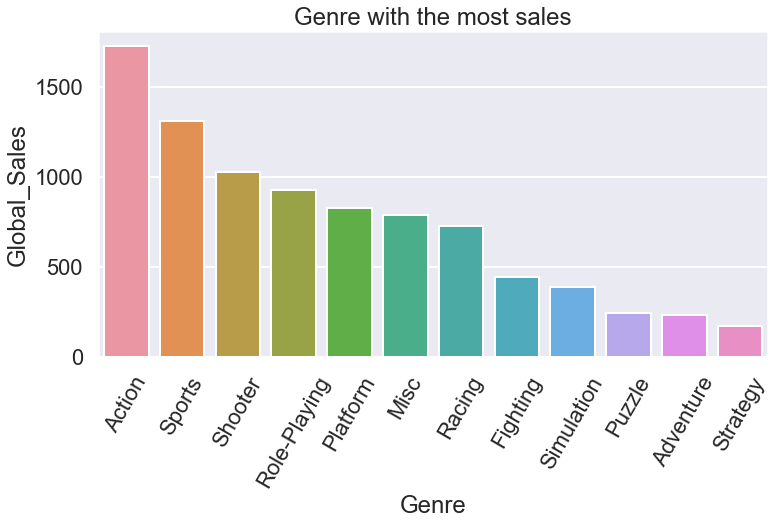

In [213]:
sns.set_style("whitegrid")
#sns.set_style("dark")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_context("poster")
Global_sale_genre = Global_sale_genre.sort_values('Global_Sales',ascending=False)
sns.barplot(x='Genre', y='Global_Sales', data=Global_sale_genre, errorbar=('ci', 0)).set(title='Genre with the most sales')

plt.xticks(rotation=60)


## Global sales per genre per year
Grouping per Genre and year to get the total global sales  
Limiting the Global sales to the values larger than 700 million

In [ ]:
Global_sale_genre_year = df_vg.groupby(by=['Genre',"Year"])['Global_Sales'].sum().reset_index().sort_values(by = ["Global_Sales"], ascending = False)
Global_sale_genre_year

In [312]:
top_genere_sales = Global_sale_genre[Global_sale_genre['Global_Sales'] > 700]
top_genere_sales

,Genre,Global_Sales
0,Action,1722.84
10,Sports,1309.24
8,Shooter,1026.20
7,Role-Playing,923.83
4,Platform,829.13
3,Misc,789.87
6,Racing,726.76


Crossing Genre values from 2 tables   
-->top_genere_sales: where we limited the global sales value to 700  
-->Global_sale_genre_year : where we filter by genre

In [ ]:
Global_sale_genre_year = Global_sale_genre_year[Global_sale_genre_year['Genre'].isin(top_genere_sales['Genre'])]


<AxesSubplot: xlabel='Year', ylabel='Global_Sales'>

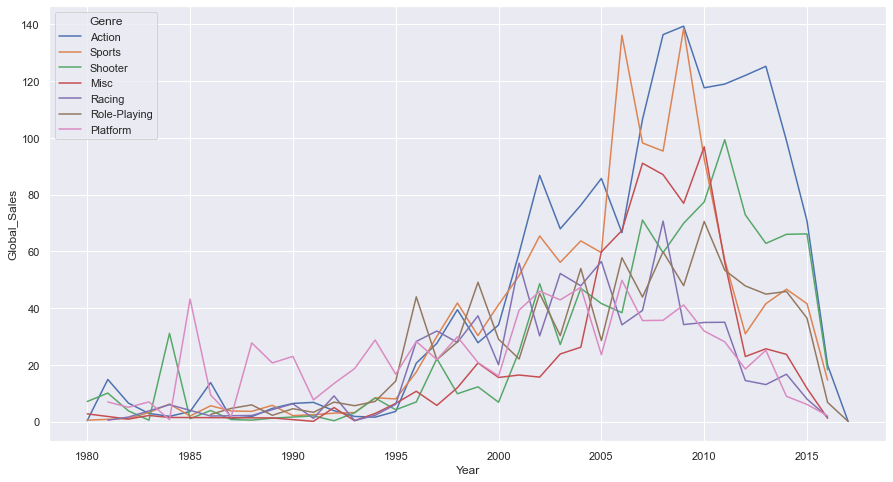

In [237]:
#line plot sales per genre per year
sns.set(rc={"figure.figsize": (15.,8.)})

sns.lineplot(x = "Year", y= "Global_Sales", hue = "Genre",data = Global_sale_genre_year)


# Year with most Sales
Limiting the years starting from 1990, the sales value before that are very low

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2001.0'),
  Text(15, 0, '1998.0'),
  Text(16, 0, '2000.0'),
  Text(17, 0, '2016.0'),
  Text(18, 0, '1999.0'),
  Text(19, 0, '1997.0'),
  Text(20, 0, '1996.0'),
  Text(21, 0, '1995.0'),
  Text(22, 0, '1994.0'),
  Text(23, 0, '1993.0'),
  Text(24, 0, '1992.0'),
  Text(25, 0, '1991.0'),
  Text(26, 0, '2017.0'),
  Text(27, 0, '2020.0')])

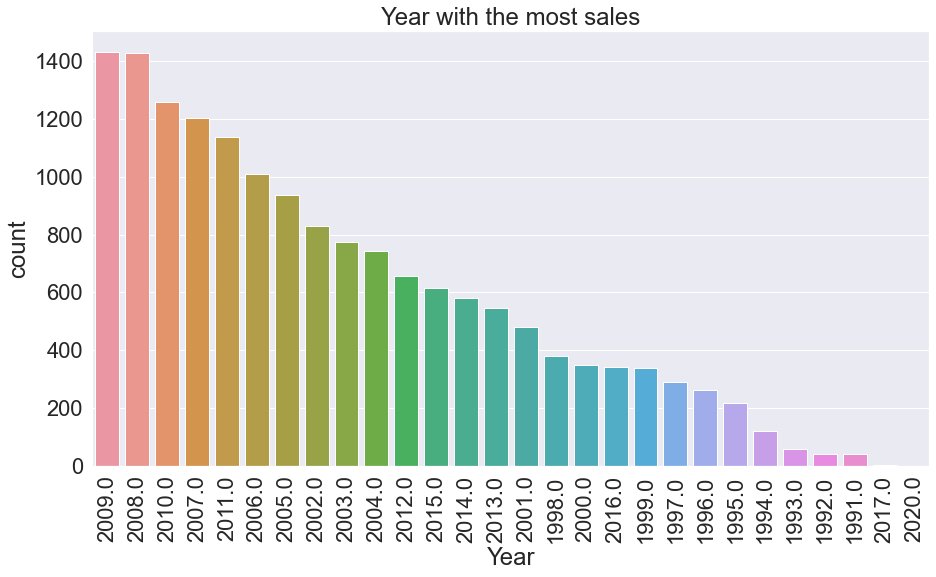

In [68]:
year_vg = df_vg[df_vg['Year'] > 1990]
sns.set(font_scale=2)
sns.countplot(x="Year", data=year_vg, order = year_vg.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index).set(title='Year with the most sales')
plt.xticks(rotation=90)


<AxesSubplot: xlabel='Year', ylabel='Global_Sales'>

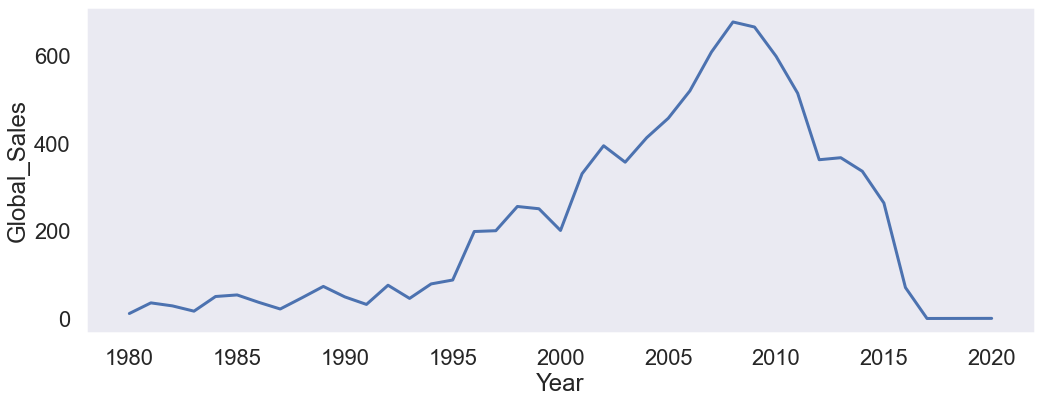

In [414]:
Global_sale_top_year = df_vg.groupby(by=["Year"])['Global_Sales'].sum().reset_index().sort_values(by = ["Year"], ascending = False)
Global_sale_top_year

sns.lineplot(x = "Year", y= "Global_Sales",data = Global_sale_top_year)

## Genres in the Top 5 years

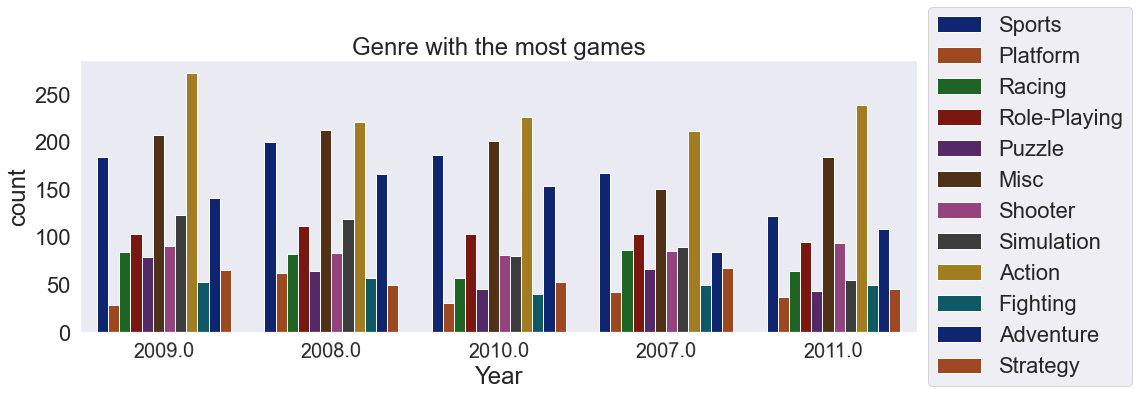

In [135]:
agg_year_genre= df_vg.groupby(["Genre","Year"]).agg({"NA_Sales":"sum", "EU_Sales":"sum", "JP_Sales": "sum", "Other_Sales": "sum"})
agg_year_genre


plt.figure(figsize=(15, 5))
sns.countplot(x="Year", data=df_vg, hue='Genre', order=df_vg.Year.value_counts().iloc[:5].index, palette="dark").set(title='Top 5 years per genre')
plt.xticks(size=20, rotation=1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.set_style("dark")



In [326]:
data_year = df_vg.groupby(by=['Year','Genre'])['Global_Sales'].sum().reset_index()
top_sale_years = data_year.groupby("Year")['Global_Sales'].sum().reset_index().sort_values("Global_Sales", ascending = False).head(6)
data_top_genre_year = data_year[data_year["Year"].isin(top_sale_years["Year"])]
data_top_genre_year = data_top_genre_year[data_top_genre_year["Genre"].isin(top_genere_sales["Genre"])]
sns.set(rc={'figure.figsize':(20,10)})
#top_genere_sales
#sns.countplot(x="Year", data=data_year, hue='Genre', order=df_vg.Year.value_counts().iloc[:5].index, palette="dark")
#sns.catplot(x="Genre", y="Global_Sales", data=data_top_genre_year, hue='Genre', col="Year", col_wrap = 3, kind="bar")
#plt.xticks(size=20, rotation=90)
 #col_wrap=0

In [366]:
#data_top_genre_year

In [367]:
df_vg_pairplt = df_vg.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
#df_vg_pairplt

C:\Users\34603\miniconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


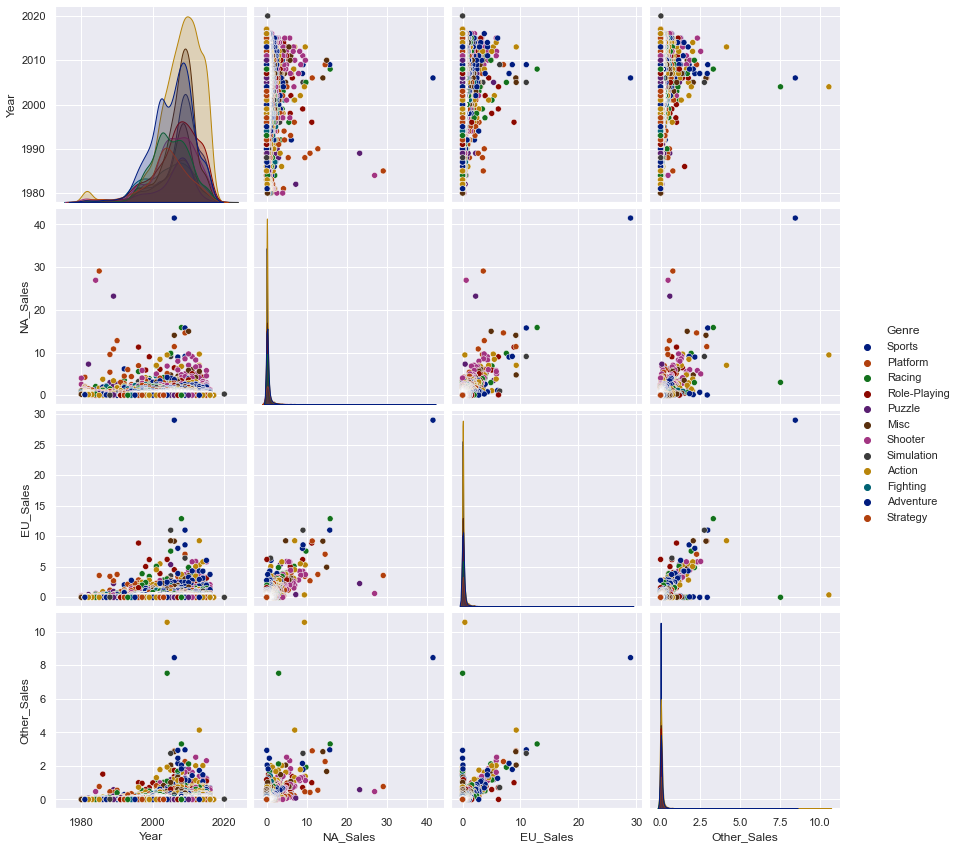

In [336]:
sns.pairplot(df_vg_pairplt, hue='Genre', palette = "dark", size =3)

In [ ]:
#the platform with the most games


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'DS'),
  Text(1, 0, 'PS2'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'X360'),
  Text(5, 0, 'PSP'),
  Text(6, 0, 'PS'),
  Text(7, 0, 'PC'),
  Text(8, 0, 'XB'),
  Text(9, 0, 'GBA'),
  Text(10, 0, 'GC'),
  Text(11, 0, '3DS'),
  Text(12, 0, 'PSV'),
  Text(13, 0, 'PS4'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'XOne'),
  Text(17, 0, 'SAT'),
  Text(18, 0, 'WiiU'),
  Text(19, 0, '2600'),
  Text(20, 0, 'NES'),
  Text(21, 0, 'GB'),
  Text(22, 0, 'DC'),
  Text(23, 0, 'GEN'),
  Text(24, 0, 'NG'),
  Text(25, 0, 'SCD'),
  Text(26, 0, 'WS'),
  Text(27, 0, '3DO'),
  Text(28, 0, 'TG16'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

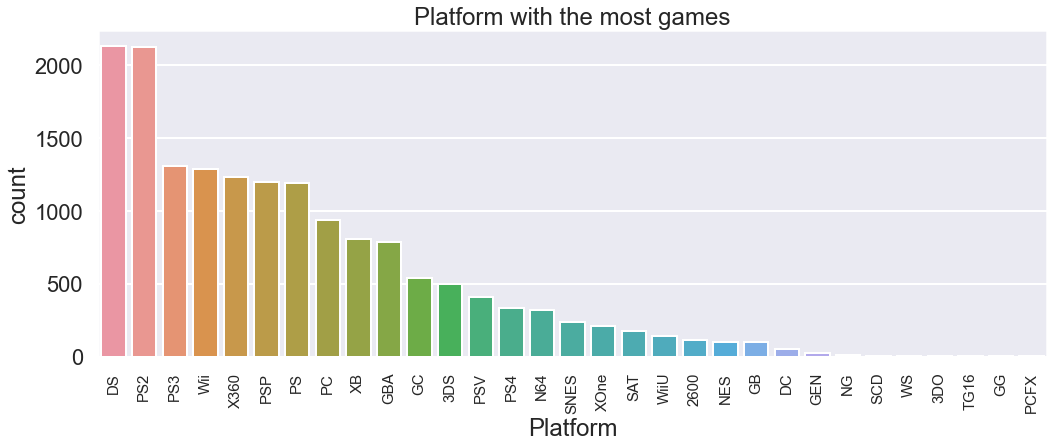

In [350]:
platform = df_vg["Platform"].value_counts()
platform
sns.countplot(x="Platform", data=df_vg, order = df_vg["Platform"].value_counts().index).set(title='Platform with the most games')
sns.color_palette("hls", 8)
plt.xticks(size=15, rotation=90)


In [368]:
#the platform with the most sales

Global_sale_plat = df_vg["Global_Sales"].groupby(df_vg["Platform"]).sum()
Global_sale_plat
test = df_vg.sort_values(by="Global_Sales", ascending = False)
pd.set_option('display.max_columns', None)


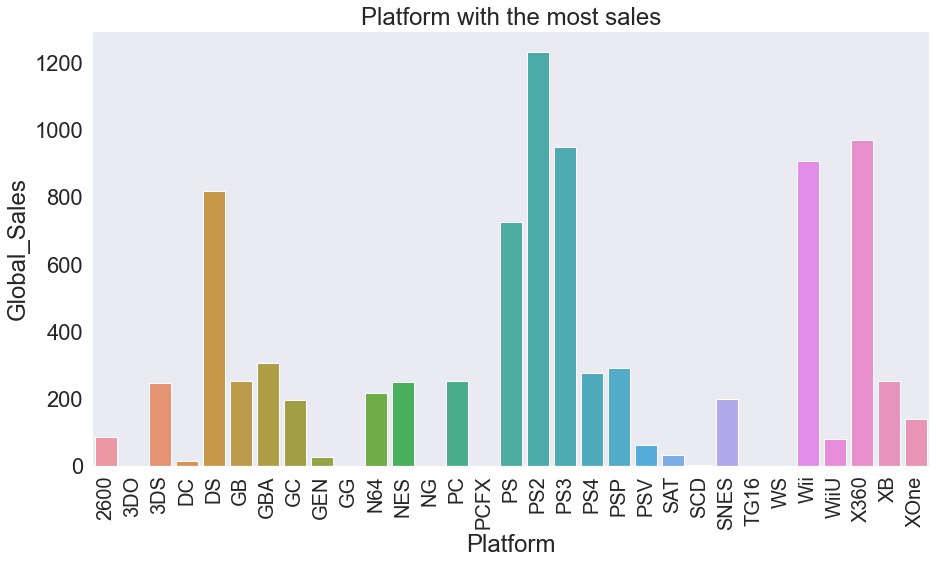

In [181]:
#the platform with the most sales

Global_sale_plat = df_vg.groupby(by=['Platform'])['Global_Sales'].sum().reset_index()
Global_sale_plat
Global_sale_plat.sort_values(by = ["Global_Sales"], ascending = False)
#Global_sale_plat.iloc[:20]

platform_plot = sns.barplot(x='Platform', y='Global_Sales', data=Global_sale_plat).set(title='Platform with the most sales')
plt.xticks(size=20, rotation=90)
y = np.arange(0, 10)


In [ ]:
#publisher with most sales


In [370]:

Global_sale_pub = df_vg["Global_Sales"].groupby(df_vg["Publisher"]).sum()
#df_vg.sort_values(by = ["Global_Sales"], ascending = False)



In [371]:
agg_year_genre= df_vg.groupby(["Genre","Year"]).agg({"NA_Sales":"sum", "EU_Sales":"sum", "JP_Sales": "sum", "Other_Sales": "sum"})
#agg_year_genre

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Fighting'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Puzzle'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Role-Playing'),
  Text(8, 0, 'Shooter'),
  Text(9, 0, 'Simulation'),
  Text(10, 0, 'Sports'),
  Text(11, 0, 'Strategy')])

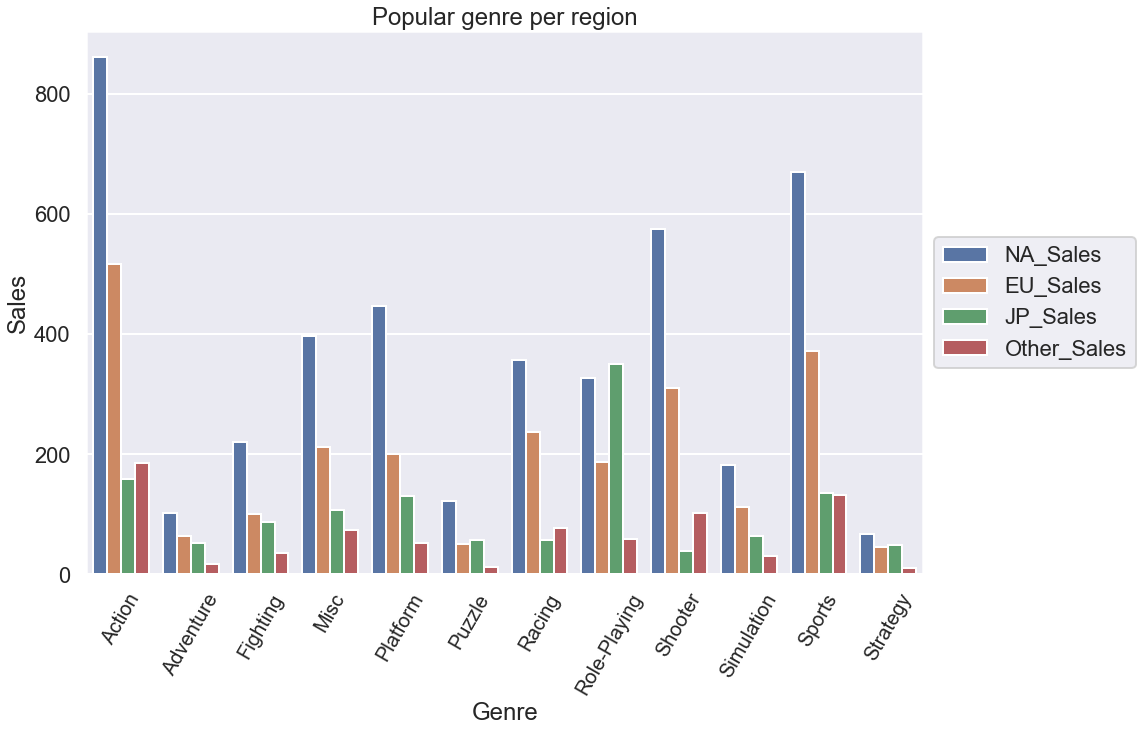

In [359]:
#popular genre / region
comp_genre = df_vg[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
compar_map = comp_genre.groupby(by=['Genre']).sum()
popular = df_vg.groupby("Genre").agg({"NA_Sales":"sum", "EU_Sales":"sum", "JP_Sales": "sum", "Other_Sales": "sum"})
compar = compar_map.reset_index()
compar = pd.melt(compar, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sales')
compar.head()

plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sales', hue='Sale_Area', data=compar).set(title = "Popular genre per region")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.set_style("dark")
plt.xticks(size=20, rotation=60)


In [372]:
pub = df_vg.groupby("Publisher").agg({"NA_Sales":"sum", "EU_Sales":"sum", "JP_Sales": "sum", "Other_Sales": "sum","Global_Sales": "sum"})
#pub.sort_values(by = ["Global_Sales"], ascending = False)


In [356]:
comp_platform = df_vg[['Platform', 'Year','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_platform.head()

,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,
1,Wii,2006.0,41.49,29.02,3.77,8.46,82.74
2,NES,1985.0,29.08,3.58,6.81,0.77,40.24
3,Wii,2008.0,15.85,12.88,3.79,3.31,35.82
4,Wii,2009.0,15.75,11.01,3.28,2.96,33.00
5,GB,1996.0,11.27,8.89,10.22,1.00,31.37


In [354]:
top_sale_region = df_vg[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_region = top_sale_region.sum().reset_index()
top_sale_region = top_sale_region.rename(columns={'index': 'Region', 0: 'Sale'})
top_sale_region

,region,sale
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


AttributeError: Rectangle.set() got an unexpected keyword argument 'title'

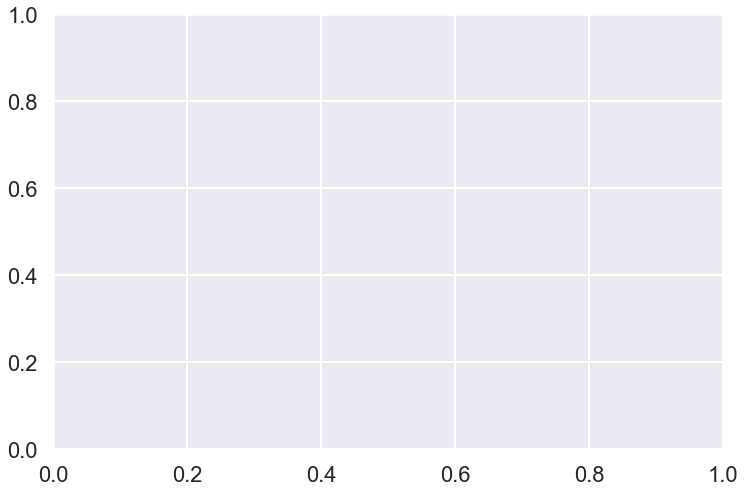

In [357]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_region, title="Global sales per region")
sns.barplot

In [375]:
import requests

In [ ]:
#https://api.worldbank.org/v2/country/WLD/indicator/SP.DYN.CBRT.IN?format=json

In [541]:
def api_birth_region(region):
    response_req = requests.get(f"https://api.worldbank.org/v2/country/{region}/indicator/SP.DYN.CBRT.IN?format=json")
    df = pd.DataFrame.from_dict(response_req.json()[1], orient = "columns")
    df = df.drop(columns=["indicator","country","decimal","countryiso3code","obs_status","unit"])
    df.rename(columns={"value":f"{region}_birth"}, inplace=True)
    df["date"] = df["date"].astype(int)
    return df

In [542]:
api_birth_region("WLD").head()

,date,WLD_birth
0,2021,NaN
1,2020,17.333599
2,2019,17.877772
3,2018,18.148411
4,2017,18.665071


In [546]:
df_birth = api_birth_region("WLD")


In [547]:
Global_sale_top_year["Year"] = Global_sale_top_year["Year"].astype(int)



In [548]:
#merge global with global birth rate per 1000 people
b = pd.merge(df_birth, Global_sale_top_year, how = "inner", left_on = "date", right_on = "Year")


In [512]:
b.head()


,date,global_birth,Year,Global_Sales
0,2020,17.333599,2020,0.29
1,2017,18.665071,2017,0.05
2,2016,19.070894,2016,70.90
3,2015,18.952225,2015,264.44
4,2014,19.464192,2014,337.03


Source :https://data.worldbank.org/indicator/SP.DYN.CBRT.IN?end=2020&start=1960&view=chart

<AxesSubplot: xlabel='Year', ylabel='Global_Sales'>

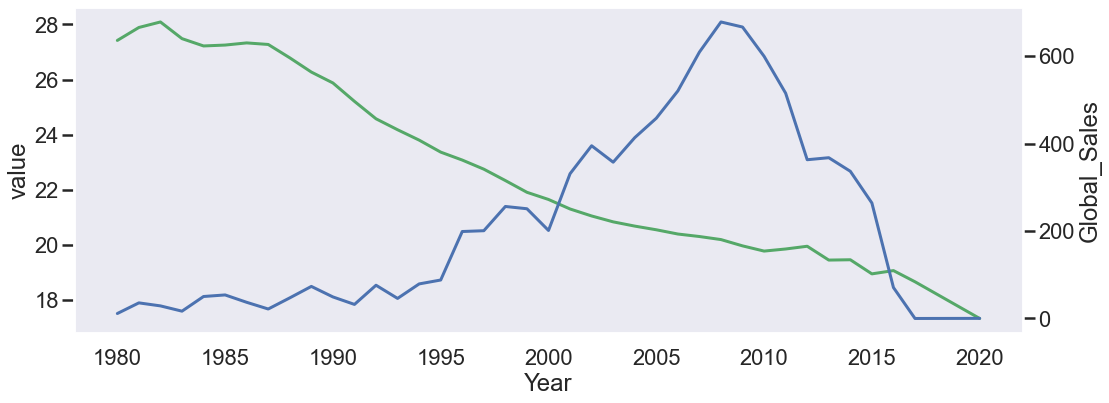

In [441]:


sns.lineplot(data=b,x = "Year", y = "value", color="g")
ax2 = plt.twinx()
sns.lineplot(data=b,x = "Year", y ="Global_Sales", color="b", ax=ax2)

In [447]:
df_corr = b.drop(columns=["Year","date"])
df_corr.corr()

,value,Global_Sales
value,1.00000,-0.63808
Global_Sales,-0.63808,1.00000


In [459]:
regional_sale_top_year = df_vg.groupby(by=["Year"])['NA_Sales','EU_Sales','JP_Sales'].sum().reset_index().sort_values(by = ["Year"], ascending = False)
regional_sale_top_year

C:\Users\34603\AppData\Local\Temp\ipykernel_9516\2108748877.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  regional_sale_top_year = df_vg.groupby(by=["Year"])['NA_Sales','EU_Sales','JP_Sales'].sum().reset_index().sort_values(by = ["Year"], ascending = False)


,Year,NA_Sales,EU_Sales,JP_Sales
38,2020.0,0.27,0.00,0.00
37,2017.0,0.00,0.00,0.05
36,2016.0,22.66,26.76,13.67
35,2015.0,102.82,97.71,33.72
34,2014.0,131.97,125.63,39.46
33,2013.0,154.77,125.80,47.59
32,2012.0,154.93,118.76,51.74
31,2011.0,241.00,167.31,53.04
30,2010.0,304.24,176.57,59.49
29,2009.0,338.85,191.59,61.89


In [481]:
#https://api.worldbank.org/v2/country/EUU/indicator/SP.DYN.CBRT.IN?format=json

In [549]:
api_birth_region("EUU").head()

,date,EUU_birth
0,2021,NaN
1,2020,9.043593
2,2019,9.326436
3,2018,9.507390
4,2017,9.716724


In [551]:
#https://api.worldbank.org/v2/country/NAC/indicator/SP.DYN.CBRT.IN?format=json
api_birth_region("NAC").head()


,date,NAC_birth
0,2021,NaN
1,2020,10.745197
2,2019,11.245336
3,2018,11.446666
4,2017,11.647963


In [552]:
#https://api.worldbank.org/v2/country/JPN/indicator/SP.DYN.CBRT.IN?format=json
api_birth_region("JPN").head()

,date,JPN_birth
0,2021,NaN
1,2020,6.8
2,2019,7.0
3,2018,7.4
4,2017,7.6


In [483]:
c = pd.merge(df_birth, Global_sale_top_year, how = "inner", left_on = "date", right_on = "Year")